In [1]:
import pandas as pd

In [2]:
# load "../data/wikipedia_pages2_w_embd/wiki_sci_embd.parquet" as df
df = pd.read_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd.parquet")
df.head()

,text,url,title,embd_text,embd_title
0,The Ulakhan Fault is a left-lateral moving tra...,https://en.wikipedia.org/wiki/Ulakhan%20Fault,Ulakhan Fault,"[-0.010125404, 0.045413326, -0.0055074026, 0.0...","[-0.027042245, 0.02827163, -0.007891712, -0.01..."
1,Tripodal ligands are tri- and tetradentate lig...,https://en.wikipedia.org/wiki/Tripodal%20ligand,Tripodal ligand,"[-0.008397752, -0.007900611, 0.028120818, 0.02...","[0.0025610395, -0.0058939615, 0.015708892, 0.0..."
2,WASP-14b is an extrasolar planet discovered in...,https://en.wikipedia.org/wiki/WASP-14b,WASP-14b,"[0.021130525, 0.019535448, 0.028013904, -0.006...","[0.02375302, 0.011801232, 0.02509789, 0.001614..."
3,Long-acting reversible contraceptives (LARC) a...,https://en.wikipedia.org/wiki/Long-acting%20re...,Long-acting reversible contraception,"[-0.014279559, -0.005928753, -0.02585963, 0.01...","[0.0039009643, 0.0050253584, -0.0144014275, 0...."
4,"AIDS (""acquired immune deficiency syndrome"") i...",https://en.wikipedia.org/wiki/HIV%20integration,HIV integration,"[-0.02654824, -0.008117266, -0.0044153593, 0.0...","[-0.0016449259, -0.004117463, -0.02023814, 0.0..."


In [3]:
# get df['text_length'] from df['text'] 
df['text_length'] = df['text'].str.len()

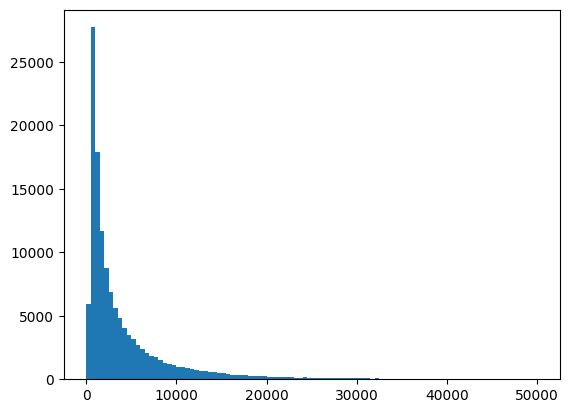

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['text_length'], bins=100, range=(0, 5e4));

In [5]:
len(df)

131049

In [6]:
import numpy as np

ranges = np.logspace(0.5, 4, 20).astype(int)
ranges

array([    3,     4,     7,    11,    17,    26,    40,    61,    94,
         143,   219,   335,   513,   784,  1199,  1832,  2801,  4281,
        6543, 10000])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:19:38<00:00, 418.91s/it]


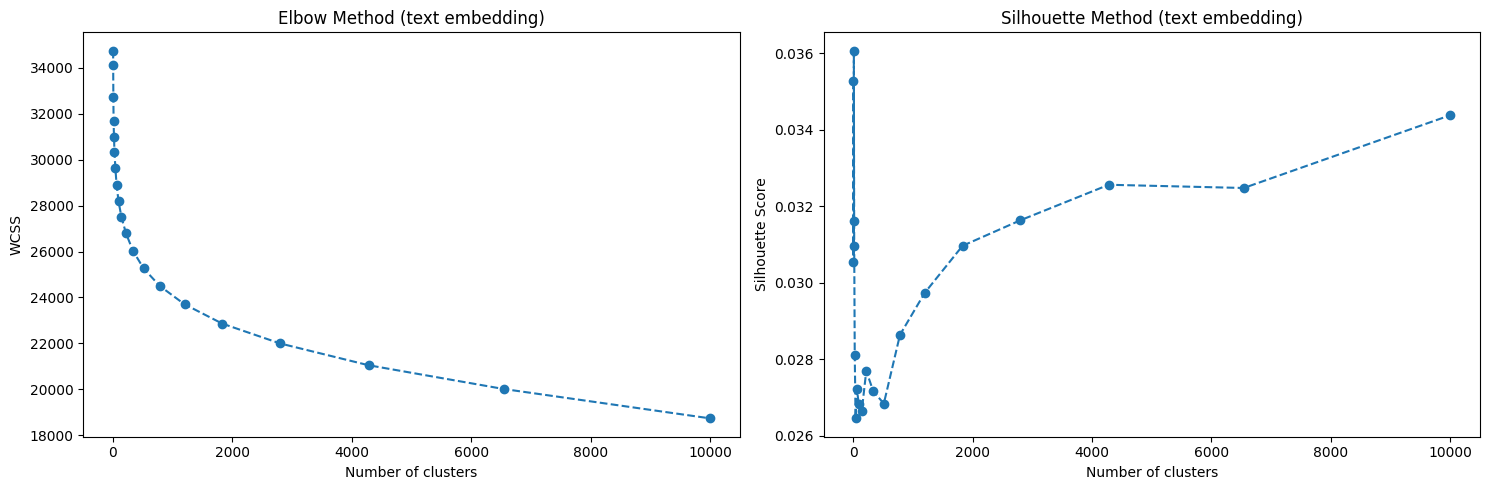

In [7]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Convert 'embd' column to a numpy matrix
X = np.stack(df['embd_text'].values)

# Using the elbow method to find the optimal number of clusters
wcss = []
silhouette_scores = []

for i in tqdm(ranges, total=len(ranges)):  # Checking for up to 10 clusters as an example
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))



plt.figure(figsize=(15,5))

# Plotting WCSS for Elbow Method
plt.subplot(1, 2, 1)
plt.plot(ranges, wcss, marker='o', linestyle='--')
plt.title('Elbow Method (text embedding)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(ranges, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method (text embedding)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:13:16<00:00, 399.84s/it]


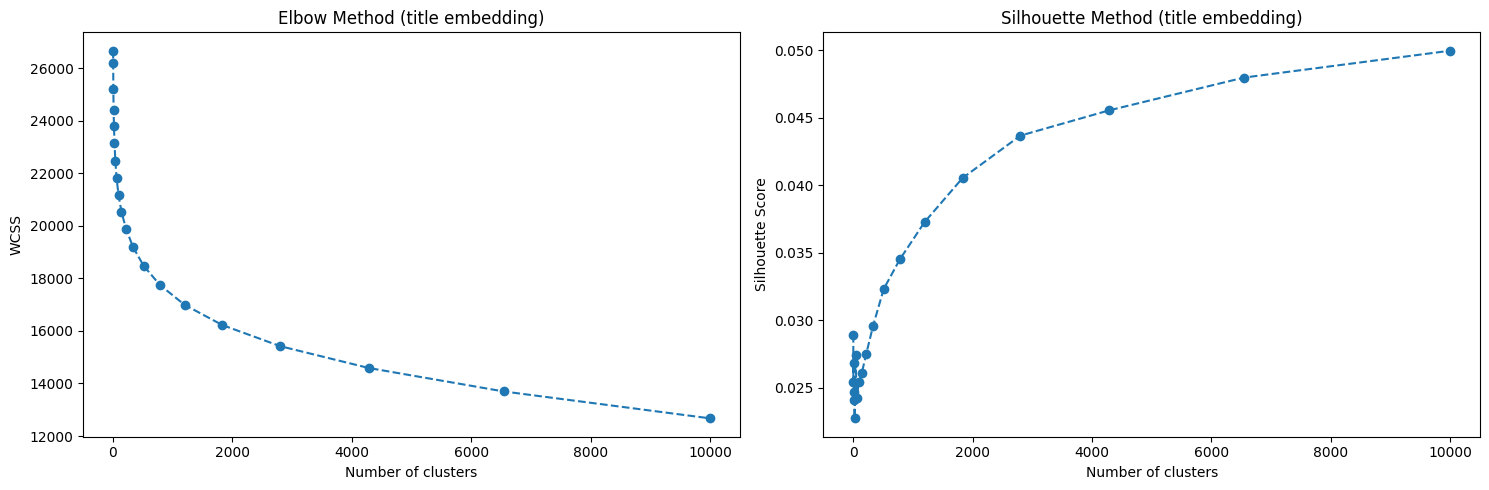

In [8]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Convert 'embd' column to a numpy matrix
X = np.stack(df['embd_title'].values)

# Using the elbow method to find the optimal number of clusters
wcss = []
silhouette_scores = []

for i in tqdm(ranges, total=len(ranges)):  # Checking for up to 10 clusters as an example
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))



plt.figure(figsize=(15,5))

# Plotting WCSS for Elbow Method
plt.subplot(1, 2, 1)
plt.plot(ranges, wcss, marker='o', linestyle='--')
plt.title('Elbow Method (title embedding)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(ranges, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method (title embedding)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [9]:
X = np.stack(df['embd_text'].values)
kmeans = KMeans(n_clusters=1000, init='k-means++', random_state=42)
df['cluster_text'] = kmeans.fit_predict(X)

X = np.stack(df['embd_title'].values)
kmeans = KMeans(n_clusters=1000, init='k-means++', random_state=42)
df['cluster_title'] = kmeans.fit_predict(X)

/home/viktor/miniconda3/envs/torch-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/viktor/miniconda3/envs/torch-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# save df to "../data/wikipedia_pages2_w_embd/wiki_sci_embd_clusters.parquet"   
df.to_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd_clusters.parquet")